In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, losses
from tensorflow.keras.optimizers import RMSprop

Sample face image:


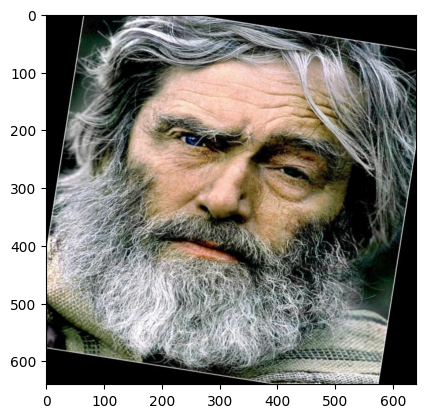

In [2]:
base_dir = "./face_capstone/"
train_dir = os.path.join(base_dir, "train/")
val_dir = os.path.join(base_dir, "validation/")
test_dir = os.path.join(base_dir, "test/")
face_dir = os.path.join(base_dir, "train/face/")
print("Sample face image:")
plt.imshow(load_img(f"{os.path.join(face_dir, os.listdir(face_dir)[69])}"))
plt.show()


In [3]:
sample_image  = load_img(f"{os.path.join(face_dir, os.listdir(face_dir)[69])}")
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (640, 640, 3)
The maximum pixel value used is: 255.0


In [4]:
class myCallback(tf.keras.callbacks.Callback): # just in case
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.90:
            print("\nDesired accuracy has been reached. Stopping training....")
            self.model.stop_training = True    

In [5]:
def train_generator():
    train_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
    train_generator_data = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(320, 320),
                                                        batch_size=20,
                                                        class_mode='binary')

    return train_generator_data

def val_generator():
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator_data = val_datagen.flow_from_directory(val_dir,
                                                        target_size=(320, 320),
                                                        batch_size=20,
                                                        class_mode='binary')

    return val_generator_data
    

In [6]:
train = train_generator()
val = val_generator()

Found 2361 images belonging to 1 classes.
Found 225 images belonging to 1 classes.


In [7]:
def train_face_model(train_generator):
    #callbacks = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(320,320,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=1e-4),
                  metrics=['accuracy'])     

    history = model.fit(train_generator,
                        steps_per_epoch=100,
                        epochs=90,
                        #callbacks=[callbacks],
                        validation_data= val,
                        verbose=2
                       )
    return history, model

In [8]:

history, trained_model = train_face_model(train)

Epoch 1/90
100/100 - 122s - loss: 0.0072 - accuracy: 0.9934 - val_loss: 1.4662e-18 - val_accuracy: 1.0000 - 122s/epoch - 1s/step
Epoch 2/90
100/100 - 116s - loss: 1.2892e-04 - accuracy: 1.0000 - val_loss: 3.8130e-32 - val_accuracy: 1.0000 - 116s/epoch - 1s/step
Epoch 3/90
100/100 - 116s - loss: 8.1538e-11 - accuracy: 1.0000 - val_loss: 3.8094e-32 - val_accuracy: 1.0000 - 116s/epoch - 1s/step
Epoch 4/90
100/100 - 116s - loss: 1.4917e-11 - accuracy: 1.0000 - val_loss: 3.8086e-32 - val_accuracy: 1.0000 - 116s/epoch - 1s/step
Epoch 5/90
100/100 - 116s - loss: 2.5273e-06 - accuracy: 1.0000 - val_loss: 5.4208e-36 - val_accuracy: 1.0000 - 116s/epoch - 1s/step
Epoch 6/90
100/100 - 116s - loss: 5.4907e-09 - accuracy: 1.0000 - val_loss: 5.1259e-36 - val_accuracy: 1.0000 - 116s/epoch - 1s/step
Epoch 7/90
100/100 - 116s - loss: 4.3683e-15 - accuracy: 1.0000 - val_loss: 5.1259e-36 - val_accuracy: 1.0000 - 116s/epoch - 1s/step
Epoch 8/90
100/100 - 116s - loss: 4.1742e-07 - accuracy: 1.0000 - val_los

In [9]:
print(f"YAAAYYYYYYYYYYYYYYYYYY WE DID IT AFTER {len(history.epoch)} epochs")

YAAAYYYYYYYYYYYYYYYYYY WE DID IT AFTER 90 epochs


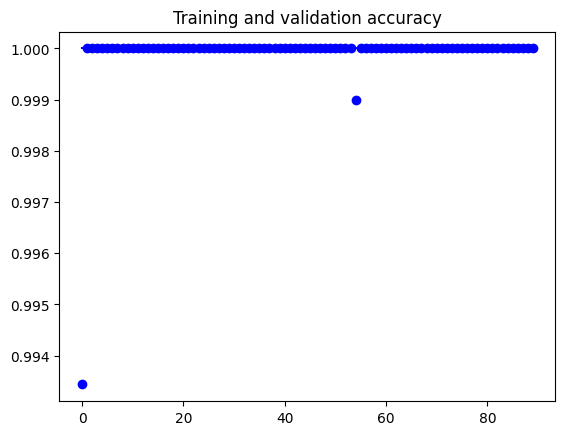

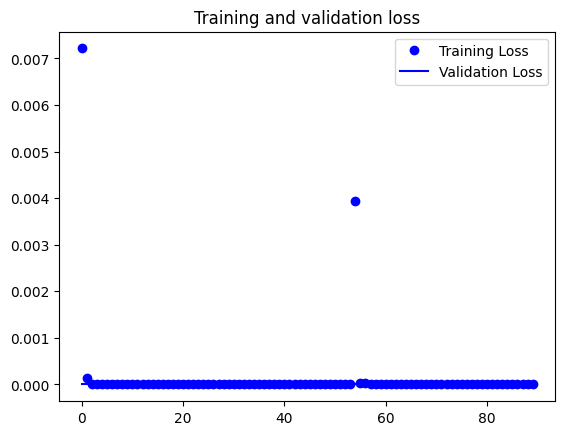

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
trained_model.save("panopticNET.h5")

c:\Python392\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
model = tf.keras.models.load_model('panopticNET.h5')

In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\RYANNN~1\AppData\Local\Temp\tmplkvboniq\assets


INFO:tensorflow:Assets written to: C:\Users\RYANNN~1\AppData\Local\Temp\tmplkvboniq\assets


In [10]:
with open('panopticNET.tflite', 'wb') as f:
    f.write(tflite_model)

In [11]:
# Load the .tflite model
tflite_model_path = 'panopticNET.tflite'

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [15]:
# Prepare sample input data (replace this with your own input data)
input_shape = input_details[0]['shape']
input_data = np.random.rand(*input_shape).astype(np.float32)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get outputs
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print intermediate output (example using the first output tensor)
print("input shape:",input_shape)
print("output shape:", output_data.shape)
print("example output values:", output_data)

input shape: [  1 320 320   3]
output shape: (1, 1)
example output values: [[0.]]
